# Experiment Objective : 
- XGBoost + Bayesian Optimization

# Hasil dan Analisa : 
- AUC score dengan menggunakan Bayesian Optimization dari library scikit optimize yaitu 0.828. Nilai ini lebih tinggi dibandingkan menggunakan random search atau grid search. 
- Waktu eksekusi lebih cepat dibandingkan dengan RS yaitu 13 menit untuk 50 iterasi sedangkan RS 22 menit dengan iterasi yang sama 

# Code : 

In [1]:
import pandas as pd
from skopt import BayesSearchCV
from skopt.space import Real,Integer
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier 

In [2]:
X_bank=pd.read_csv('dataset/X_bank_preprocessed.csv').to_numpy()
y_bank=pd.read_csv('dataset/y_bank_preprocessed.csv').to_numpy().ravel()

In [3]:
model=XGBClassifier()

In [4]:
params={
    'eta': Real(0.001,1,'log-uniform'), # learning rate 
    'subsample': Real(0,1,'uniform'),
    'max_depth': Integer(5,50),
    'gamma': Real(1e-9,1,'log-uniform'),
    'min_child_weight': Integer(0,15)
}

- referensi untuk prior distribution:
https://www.kaggle.com/nanomathias/bayesian-optimization-of-xgboost-lb-0-9769 <br>
- penggunaan tipe data pada tiap hyperparameter : https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html <br>
- untuk min value dari gamma tidak bisa jika 0, maka diganti dengan nilai yang sangat kecil mendekati 0
- by default, base dari log adalah 10

## Experiment 1

In [30]:
bayes_tuner= BayesSearchCV(model, 
                       params, 
                       n_jobs=-1, 
                       n_iter=50,
                       scoring='roc_auc',
                       cv=5,
                       random_state=1)

default surrogate function adalah Gaussian Process

In [31]:
bayes_tuner.fit(X_bank,y_bank)

BayesSearchCV(cv=5, error_score='raise',
              estimator=XGBClassifier(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=None, max_delta_step=None,
                                      max_depth=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_...
              search_spaces={'eta': Real(low=0.001, high=1, prior='log-uniform', transform='identity'),
                             'gamma': Real(low=1e-09, high=1, prior='log-uniform', transform='identity'),
                             'max_depth': Integer(low=5, high=5

In [32]:
index=bayes_tuner.best_index_
print("Best params: ")
print(bayes_tuner.best_params_)
print("AUC: ")
print(bayes_tuner.cv_results_['mean_test_score'][index])
print("std: ")
print(bayes_tuner.cv_results_['std_test_score'][index])

Best params: 
OrderedDict([('eta', 0.0032453549635184584), ('gamma', 0.0240750964750453), ('max_depth', 21), ('min_child_weight', 15), ('subsample', 0.017525325994122282)])
AUC: 
0.8278029873155748
std: 
0.07065837411116632


In [8]:
bayes_tuner_2= BayesSearchCV(model, 
                       params, 
                       n_jobs=-1, 
                       n_iter=100,
                       scoring='roc_auc',
                       cv=5,
                       random_state=1)
bayes_tuner_2.fit(X_bank,y_bank)

BayesSearchCV(cv=5, error_score='raise',
              estimator=XGBClassifier(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=None, max_delta_step=None,
                                      max_depth=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_...
              search_spaces={'eta': Real(low=0.001, high=1, prior='log-uniform', transform='identity'),
                             'gamma': Real(low=1e-09, high=1, prior='log-uniform', transform='identity'),
                             'max_depth': Integer(low=5, high=5

In [9]:
index=bayes_tuner_2.best_index_
print("Best params: ")
print(bayes_tuner_2.best_params_)
print("AUC: ")
print(bayes_tuner_2.cv_results_['mean_test_score'][index])
print("std: ")
print(bayes_tuner_2.cv_results_['std_test_score'][index])

Best params: 
OrderedDict([('eta', 0.005115290607228039), ('gamma', 3.1502595168304236e-09), ('max_depth', 44), ('min_child_weight', 10), ('subsample', 0.02615689254511774)])
AUC: 
0.8288278120110921
std: 
0.06861540557751607


## Experiment 2 

In [5]:
iteration=200
auc=[]
std=[]

bayes_search= BayesSearchCV(model, 
                       params, 
                       n_jobs=-1, 
                       n_iter=iteration,
                       scoring='roc_auc',
                       cv=5,
                       random_state=1)
bayes_search.fit(X_bank,y_bank)
best_index=bayes_search.best_index_
auc.append(bayes_search.cv_results_['mean_test_score'])
std.append(bayes_search.cv_results_['std_test_score'])
best_param=bayes_search.best_params_

In [6]:
print("Iterasi: ",iteration)
print("All AUC: ",auc,'\n')
print(np.mean(auc[0]))
print("All std: ",std[0],'\n')
print("Best Hyperparameter: ",best_param,'\n')
print("Best index/iterasi : ",best_index)
print("Best AUC :",auc[0][best_index],"( std:",std[0][best_index],")",'\n')


Iterasi:  200
All AUC:  [[0.5148133593235218, 0.5913253103608251, 0.5166304234551046, 0.5533099645064428, 0.5375778286254731, 0.5126212125610734, 0.6348239891222726, 0.5845585065290724, 0.6227191295680338, 0.5843552440329529, 0.6983021854479022, 0.5, 0.8149388137227944, 0.5, 0.5, 0.5, 0.7798904763275272, 0.7235998377313273, 0.8278029873155748, 0.5854527642327165, 0.8227112930204659, 0.5766709899235465, 0.7190072440527993, 0.81968078112581, 0.8255010327973253, 0.7247106431843354, 0.5873474791147393, 0.6802492399706085, 0.8250538164690638, 0.8204369336002351, 0.8130157405874804, 0.8252871849441782, 0.8219113991676572, 0.8148753286951358, 0.7349585882859003, 0.8205438440210839, 0.6722501026446484, 0.8248882360202011, 0.727583362952206, 0.8170163210914595, 0.7731384016163512, 0.8194295094763032, 0.6684504703263293, 0.7865937826619609, 0.49026664685949867, 0.6613220798207529, 0.5974393360243718, 0.8046525567297433, 0.5739526104317008, 0.7645466705743386, 0.5781438470837341, 0.63955040130634

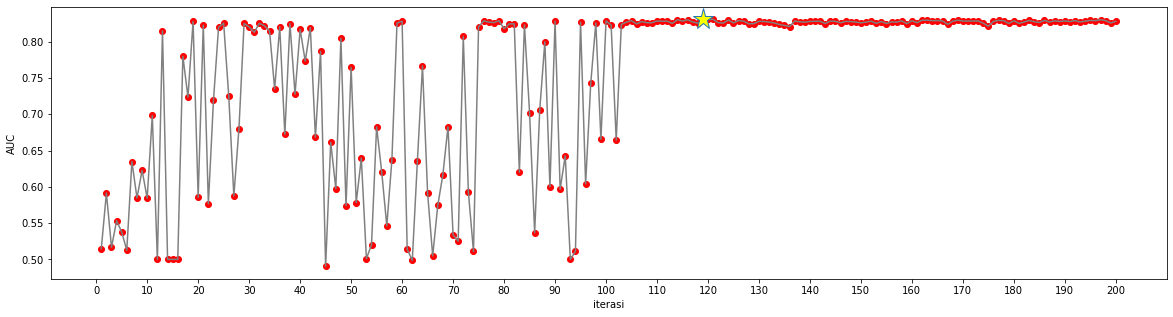

In [8]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20,5))
x=range(1,iteration+1)
y=auc[0]
error=std[0]
plt.plot(x,y,'or')
plt.plot(x,y,color='gray')
plt.plot(x[best_index],y[best_index],marker='*',markersize=22,markerfacecolor='yellow')
fig=plt.xticks(range(1,iteration+1))
fig=plt.xlabel('iterasi')
fig=plt.ylabel('AUC')
fig=plt.xticks(range(0,210,10))

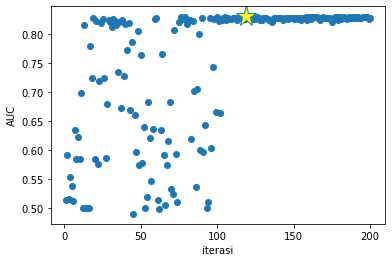

In [9]:
fig=plt.figure()
x=range(1,iteration+1)
y=auc[0]
error=std[0]
plt.scatter(x,y)
plt.plot(x[best_index],y[best_index],marker='*',markersize=22,markerfacecolor='yellow')
fig=plt.xticks(range(1,iteration+1))
fig=plt.xlabel('iterasi')
fig=plt.ylabel('AUC')
fig=plt.xticks(range(0,210,50))

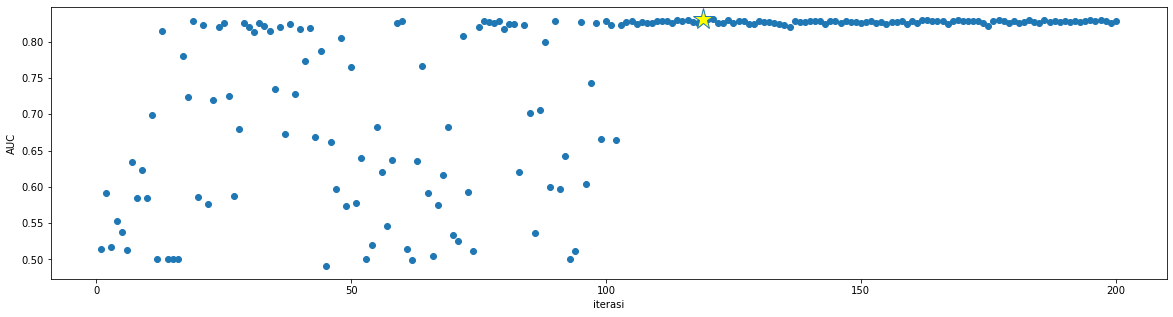

In [11]:
fig=plt.figure(figsize=(20,5))
x=range(1,iteration+1)
y=auc[0]
error=std[0]
plt.scatter(x,y)
plt.plot(x[best_index],y[best_index],marker='*',markersize=22,markerfacecolor='yellow')
fig=plt.xticks(range(1,iteration+1))
fig=plt.xlabel('iterasi')
fig=plt.ylabel('AUC')
fig=plt.xticks(range(0,210,50))